# Get dataset

In [ ]:
# TODO: Get dataset
import gdown

url = 'https://drive.google.com/uc?id=1S9lZmbaPyGohZ6INfTHhcmOxD9r4DQrR'
output = '/content/denoised_dataset.zip'

gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1S9lZmbaPyGohZ6INfTHhcmOxD9r4DQrR
From (redirected): https://drive.google.com/uc?id=1S9lZmbaPyGohZ6INfTHhcmOxD9r4DQrR&confirm=t&uuid=537686fd-c1ad-4a55-b90f-1cb6778c6186
To: /content/denoised_dataset.zip
100%|██████████| 675M/675M [00:16<00:00, 41.0MB/s]


'/content/denoised_dataset.zip'

In [ ]:
# prompt: mount google drive

from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# TODO : Extract denoised dataset

!unzip -q "/content/denoised_dataset.zip" -d "/content/"


In [ ]:
!ls

denoised_dataset.zip  denoised_enrollments  denoised_test  drive  sample_data


### Change the folder paths here

In [ ]:
train_path = "/content/denoised_enrollments"
test_path = "/content/denoised_test"
trials_file_path = "/content/signle-channel-trials.txt"

I am going to extract embeddings from the audio files with **Noise**

In [ ]:
import os

In [ ]:
# TODO: Extract embeddings
!pip install xvector-jtubespeech

In [ ]:
train_files = os.listdir(train_path)

In [ ]:
speaker_files = {}

In [ ]:
for file_name in train_files:
  [speaker, audio_f_name] = file_name.split("-")
  if speaker not in speaker_files:
    speaker_files[speaker] = []
    speaker_files[speaker].append(file_name)
  else:
    speaker_files[speaker].append(file_name)

In [ ]:
count = 0
count_files = 0
for k, v in speaker_files.items():
  # print(k)
  count += 1
  count_files += len(v)

print("count", count)
print("count_files", count_files)

count 75
count_files 225


In [ ]:
# os.listdir(train_path)

In [ ]:
import numpy as np
from scipy.io import wavfile
import torch
from torchaudio.compliance import kaldi

from xvector_jtubespeech import XVector

def extract_xvector(
  model, # xvector model
  wav   # 16kHz mono
):
  # extract mfcc
  wav = torch.from_numpy(wav.astype(np.float32)).unsqueeze(0)
  mfcc = kaldi.mfcc(wav, num_ceps=24, num_mel_bins=24) # [1, T, 24]
  mfcc = mfcc.unsqueeze(0)

  # extract xvector
  xvector = model.vectorize(mfcc) # (1, 512)
  xvector = xvector.to("cpu").detach().numpy().copy()[0]

  return xvector



In [ ]:
import torch
model = torch.hub.load("sarulab-speech/xvector_jtubespeech", "xvector", trust_repo=True)

Downloading: "https://github.com/sarulab-speech/xvector_jtubespeech/zipball/master" to /root/.cache/torch/hub/master.zip
Downloading: "https://raw.githubusercontent.com/sarulab-speech/xvector_jtubespeech/master/xvector.pth" to /root/.cache/torch/hub/checkpoints/xvector.pth
100%|██████████| 19.5M/19.5M [00:00<00:00, 44.3MB/s]


In [ ]:
print(train_path)

/content/denoised_enrollments


In [ ]:
speaker_files["spk_2"]

['spk_2-2_1_1_0_d5_ch5.wav',
 'spk_2-2_1_1_0_d6_ch5.wav',
 'spk_2-2_1_1_1_d3_ch5.wav']

In [ ]:
audio_path_2_0 = train_path + "/" + speaker_files["spk_2"][0]
audio_path_2_1 = train_path + "/" + speaker_files["spk_2"][1]
audio_path_2_2 = train_path + "/" + speaker_files["spk_2"][2]

In [ ]:
speaker_files["spk_26"]

['spk_26-26_38_0_0_d4_ch5.wav',
 'spk_26-26_38_0_0_d1_ch5.wav',
 'spk_26-26_38_0_0_d3_ch5.wav']

In [ ]:
audio_path_26_0 = train_path + "/" + speaker_files["spk_26"][0]
audio_path_26_1 = train_path + "/" + speaker_files["spk_26"][1]
audio_path_26_2 = train_path + "/" + speaker_files["spk_26"][2]

In [ ]:
_, wav_2_0 = wavfile.read(audio_path_2_0) # 16kHz mono
_, wav_2_1 = wavfile.read(audio_path_2_1)
_, wav_2_2 = wavfile.read(audio_path_2_2)

_, wav_26_0 = wavfile.read(audio_path_26_0) # 16kHz mono
_, wav_26_1 = wavfile.read(audio_path_26_1)
_, wav_26_2 = wavfile.read(audio_path_26_2)

xvector_2_0 = extract_xvector(model, wav_2_0) # (512, )
xvector_2_1 = extract_xvector(model, wav_2_1)
xvector_2_2 = extract_xvector(model, wav_2_2)

xvector_26_0 = extract_xvector(model, wav_26_0) # (512, )
xvector_26_1 = extract_xvector(model, wav_26_1)
xvector_26_2 = extract_xvector(model, wav_26_2)


# xvector2_2 = extract_xvector(model, )

In [ ]:
xvector_26_0.shape

(512,)

In [ ]:
tensor_2_0 = torch.tensor(xvector_2_0)
tensor_2_1 = torch.tensor(xvector_2_1)
tensor_2_2 = torch.tensor(xvector_2_2)

tensor_26_0 = torch.tensor(xvector_26_0)
tensor_26_1 = torch.tensor(xvector_26_1)
tensor_26_2 = torch.tensor(xvector_26_2)

In [ ]:
tensor_26_0.shape

torch.Size([512])

# Calculate the Cosine Distance

In [ ]:
import torch
import torch.nn.functional as F

# Compute cosine similarity
cosine_similarity_2_0_2_1 = F.cosine_similarity(tensor_2_0, tensor_2_1, dim=0)
cosine_similarity_2_0_26_1 = F.cosine_similarity(tensor_2_0, tensor_26_1, dim=0)

In [ ]:
cosine_similarity_2_0_26_1.item()

0.9698407649993896

In [ ]:
# Compute cosine distance (1 - cosine similarity)
cosine_distance_2_0_2_1 = 1 - cosine_similarity_2_0_2_1.item()
cosine_distance_2_0_26_1 = 1 - cosine_similarity_2_0_26_1.item()

print("Cosine Similarity: _2_0_2_1", cosine_similarity_2_0_2_1.item())
print("Cosine Distance: _2_0_2_1", cosine_distance_2_0_2_1)
print()

print("Cosine Similarity: _2_0_26_1", cosine_similarity_2_0_26_1.item())
print("Cosine Distance: _2_0_26_1", cosine_distance_2_0_26_1)

Cosine Similarity: _2_0_2_1 0.9597436189651489
Cosine Distance: _2_0_2_1 0.040256381034851074

Cosine Similarity: _2_0_26_1 0.9698407649993896
Cosine Distance: _2_0_26_1 0.03015923500061035


In [ ]:
speaker_names = list(speaker_files.keys())

### Store X-Vectors of speakers in a dictionary

In [ ]:
speaker_xvectors = {}

In [ ]:
for speaker in speaker_names:
  audio_path = train_path + "/" + speaker_files[speaker][-1]
  _, wav_file = wavfile.read(audio_path) # 16kHz mono

  speaker_xvectors[speaker] = torch.tensor(extract_xvector(model, wav_file))

In [ ]:
len(list(speaker_xvectors.keys()))

75

In [ ]:
len(os.listdir(test_path))

10332

In [ ]:
trials_file = open(trials_file_path, "r")
trials = trials_file.readlines()
# trials

In [ ]:
# calculate_cosine_similarity
cosine_similarity_list = []
cosine_distance_list = []

In [ ]:
def get_trial(index:int):
  trial_name = trials[index]
  trial_spk, trial_wav = trial_name.split("-")
  trial_wav = trial_wav.split("\n")
  trial_audio_name = trial_wav[0]
  trial_wav = trial_audio_name + ".wav"

  audio_path = test_path + "/" + trial_wav

  return (trial_name, trial_spk, trial_audio_name, trial_wav, audio_path)

In [ ]:
speaker_xvectors["spk_2"].shape

torch.Size([512])

In [ ]:
cos_sim_file = open("/content/drive/MyDrive/sp_cup_output/" +"cos_sim.txt","w")
cos_dist_file = open("/content/drive/MyDrive/sp_cup_output/cos_dist.txt","w")

In [ ]:
cos_sim_file.close()
cos_dist_file.close()

In [ ]:
cos_sim_file = open("/content/drive/MyDrive/sp_cup_output/cos_sim.txt","a")
cos_dist_file = open("/content/drive/MyDrive/sp_cup_output/cos_dist.txt","a")

In [ ]:
# trials

In [ ]:
# For each trail calculate the xvector for each
for i in range(len(trials)):
  # print(get_trial(i))

  trial_key, test_spk, test_audio_name, test_wav, test_audio_path = get_trial(i)

  # Calculate the xvector tensor for test_audio
  audio_path = train_path + "/" + speaker_files[speaker][-1]
  _, wav_file = wavfile.read(test_audio_path) # 16kHz mono
  test_audio_xvector = torch.tensor(extract_xvector(model, wav_file))

  # Test speaker xvector
  test_spk_xvector = speaker_xvectors[test_spk]

  # Calculate cosine similarity
  cos_sim = F.cosine_similarity(test_spk_xvector, test_audio_xvector, dim=0).item()

  # Calculate cosine distance
  cos_dist = 1 - cos_sim
  # print(cos_sim, cos_dist)

  # Round values
  cos_sim_round = round(cos_sim, 7)
  cos_dist_round = round(cos_dist, 7)

  # Save to list
  cosine_similarity_list.append(cos_sim)
  cosine_distance_list.append(cos_dist)
  # break

  # Save to files
  cos_sim_line = test_spk + "	" + test_audio_name + "	" + str(cos_sim_round) + "\n"
  cos_dist_line = test_spk + "	" + test_audio_name + "	" + str(cos_dist_round) + "\n"
  # print(cos_sim_line)
  # print(cos_dist_line)

  cos_sim_file.write(cos_sim_line)
  cos_dist_file.write(cos_dist_line)

  if i % 1000 == 0:
    print(i)
  # if i == 3:
  #   break

cos_sim_file.close()
cos_dist_file.close()

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000


In [ ]:
audio_path = test_path + "/" + trial_wav
audio_path

In [ ]:


# TODO: Calculate the Cosine Distance
# TODO : Save the cosine ditances to a text file

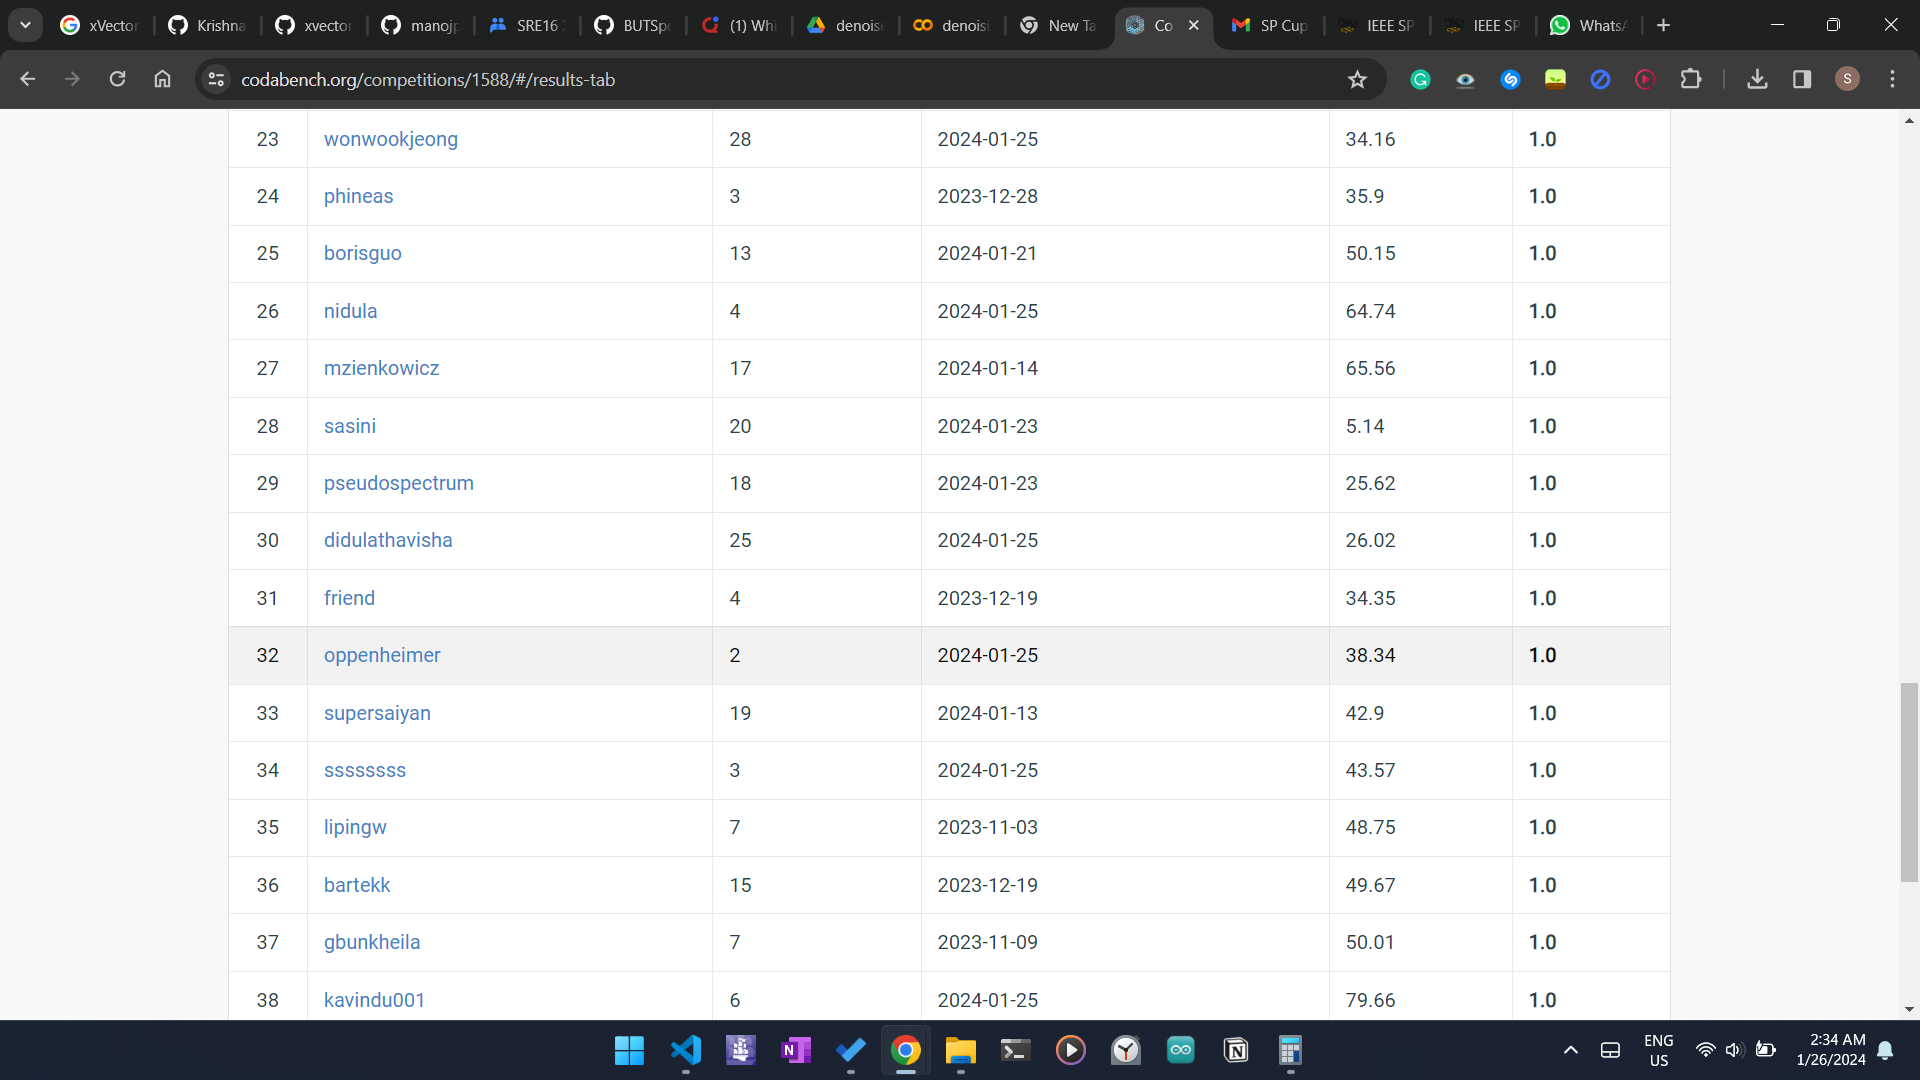